In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
y =data['prices']
X =data.drop('prices', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

# TODO: Minimum price of the data
minimum_price = np.min(y)

# TODO: Maximum price of the data
maximum_price = np.max(y)

# TODO: Mean price of the data
mean_price = np.mean(y)

# TODO: Median price of the data
median_price = np.median(y)

# TODO: Standard deviation of prices of the data
std_price = np.std(y)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Boston housing dataset has 489 data points with 4 variables each.
Statistics for Boston housing dataset:

Minimum price: $105000
Maximum price: $1024800
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_vald, y_train, y_vald = train_test_split(X, y, test_size=0.2)

In [111]:
from sklearn import svm
model=svm.SVC(kernel='linear',C=40,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.30612244897959184

In [112]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),X_train,y_train,cv=5)
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),X_train,y_train,cv=5)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.00473934, 0.00990099, 0.        , 0.        , 0.        ])

In [113]:
cross_val_score(svm.SVC(kernel='linear',C=20,gamma='auto'),X_train,y_train,cv=5)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.01895735, 0.        , 0.01960784, 0.15      , 0.        ])

In [114]:
from sklearn.model_selection  import GridSearchCV

In [115]:
clf=GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['linear','rbf']
},cv=5,return_train_score=False)
clf.fit(X,y)
clf.cv_results_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([0.25371943, 0.2426548 , 0.39417968, 0.25529156, 0.52940044,
        0.2517148 ]),
 'std_fit_time': array([0.0764887 , 0.07549265, 0.12934131, 0.07976281, 0.1552801 ,
        0.08260831]),
 'mean_score_time': array([0.04466968, 0.03973985, 0.04207349, 0.03996921, 0.04226356,
        0.03878961]),
 'std_score_time': array([0.02203025, 0.02090022, 0.0199106 , 0.01956168, 0.02041245,
        0.02046524]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'}],


In [116]:
df=pd.DataFrame(clf.cv_results_)

In [117]:
df[['param_C','param_kernel','mean_test_score']]
clf.best_score_

0.02044989775051125

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

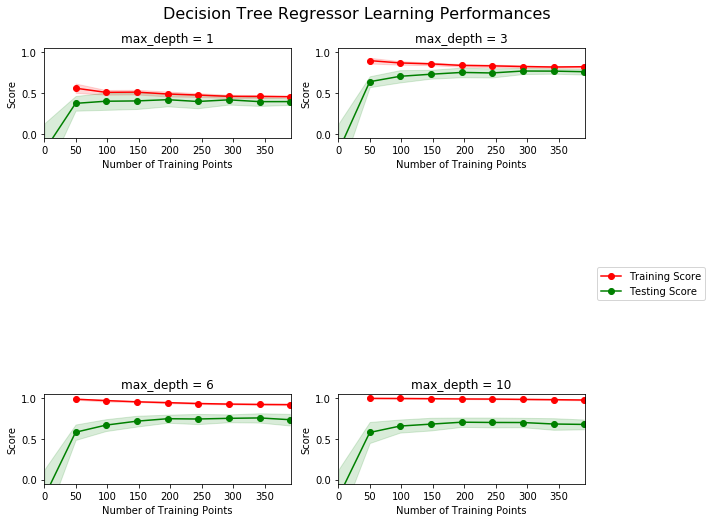

In [119]:
clf.best_score_
vs.ModelLearning(X,y)

In [120]:
for i in range(1,10):
    from sklearn.tree import DecisionTreeRegressor
    regressor=DecisionTreeRegressor(max_depth=i)
    regressor.fit(X_train,y_train)
    
    print("for max_depth_" ,i,"th" "_it has accuracy:",regressor.score(X_vald,y_vald) )

for max_depth_ 1 th_it has accuracy: 0.19032133456915823
for max_depth_ 2 th_it has accuracy: 0.5600083765098134
for max_depth_ 3 th_it has accuracy: 0.7211828223922541
for max_depth_ 4 th_it has accuracy: 0.8033988664582353
for max_depth_ 5 th_it has accuracy: 0.808206811259173
for max_depth_ 6 th_it has accuracy: 0.7827961336172681
for max_depth_ 7 th_it has accuracy: 0.7584324927203642
for max_depth_ 8 th_it has accuracy: 0.6936511033438821
for max_depth_ 9 th_it has accuracy: 0.6888417385820567


In [124]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train,y_train)
print("for max_depth_" ,4,"th in validation set" "_it has accuracy:",regressor.score(X_vald,y_vald) )

for max_depth_ 4 th in validation set_it has accuracy: 0.8033988664582353


In [125]:
regressor.score(X_test,y_test)

0.8639778882935198